In [1]:
import pandas as pd
import requests
import time
from tqdm import tqdm  # Progress bar for Jupyter

# Load dataset (update filename)
df = pd.read_csv('superstore.csv')


In [2]:
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [5]:
df = df.drop(columns=['记录数'])


In [6]:
print("🔹 Dataset Info:")
print(df.info())

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   Order.Date      51290 non-null  object 
 8   Order.ID        51290 non-null  object 
 9   Order.Priority  51290 non-null  object 
 10  Product.ID      51290 non-null  object 
 11  Product.Name    51290 non-null  object 
 12  Profit          51290 non-null  float64
 13  Quantity        51290 non-null  int64  
 14  Region          51290 non-null  object 
 15  Row.ID          51290 non-null  int64  
 16  Sales           51290 non-null  int64  
 17  Segment        

In [7]:
print("🔹 Column Names:", df.columns)

🔹 Column Names: Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')


In [8]:
print("\n🔹 Missing Values:")
print(df.isnull().sum())


🔹 Missing Values:
Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64


In [10]:
df['Order.Date'] = pd.to_datetime(df['Order.Date'], errors='coerce')

In [11]:
print(df.describe())

           Discount                     Order.Date        Profit  \
count  51290.000000                          51290  51290.000000   
mean       0.142908  2013-05-11 21:26:49.155780864     28.610982   
min        0.000000            2011-01-01 00:00:00  -6599.978000   
25%        0.000000            2012-06-19 00:00:00      0.000000   
50%        0.000000            2013-07-08 00:00:00      9.240000   
75%        0.200000            2014-05-22 00:00:00     36.810000   
max        0.850000            2014-12-31 00:00:00   8399.976000   
std        0.212280                            NaN    174.340972   

           Quantity       Row.ID         Sales  Shipping.Cost          Year  \
count  51290.000000  51290.00000  51290.000000   51290.000000  51290.000000   
mean       3.476545  25645.50000    246.498440      26.375818   2012.777208   
min        1.000000      1.00000      0.000000       0.002000   2011.000000   
25%        2.000000  12823.25000     31.000000       2.610000   2012.00

In [14]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

df = remove_outliers(df, 'Sales')
df = remove_outliers(df, 'Profit')

In [15]:
# Convert 'Order Date' to datetime
df['Order.Date'] = pd.to_datetime(df['Order.Date'])

# Extract features
df['Year'] = df['Order.Date'].dt.year
df['Month'] = df['Order.Date'].dt.month
df['Weekday'] = df['Order.Date'].dt.day_name()
df['WeekOfYear'] = df['Order.Date'].dt.isocalendar().week
df['IsWeekend'] = df['Weekday'].isin(['Saturday', 'Sunday']).astype(int)

# Check transformed data
print(df[['Order.Date', 'Year', 'Month', 'Weekday', 'WeekOfYear', 'IsWeekend']].head())


  Order.Date  Year  Month    Weekday  WeekOfYear  IsWeekend
0 2011-01-07  2011      1     Friday           1          0
1 2011-01-21  2011      1     Friday           3          0
2 2011-08-05  2011      8     Friday          31          0
4 2011-09-29  2011      9   Thursday          39          0
5 2011-10-19  2011     10  Wednesday          42          0


In [16]:
df = df.sort_values(by='Order.Date')
df['Sales_Growth'] = df['Sales'].pct_change()

# Fill NaN values caused by first row
df['Sales_Growth'].fillna(0, inplace=True)


C:\Users\kgadg\AppData\Local\Temp\ipykernel_21788\72975405.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales_Growth'].fillna(0, inplace=True)


C:\Users\kgadg\anaconda3\envs\Deep_Learning\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


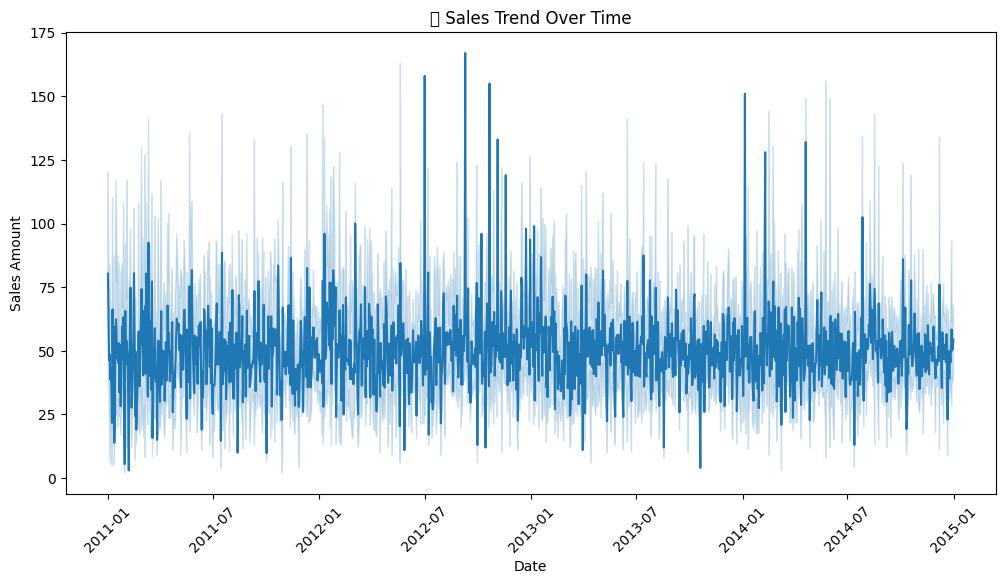

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
plt.figure(figsize=(12,6))
sns.lineplot(x=df['Order.Date'], y=df['Sales'])
plt.title("📈 Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45)
plt.show()


C:\Users\kgadg\anaconda3\envs\Deep_Learning\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


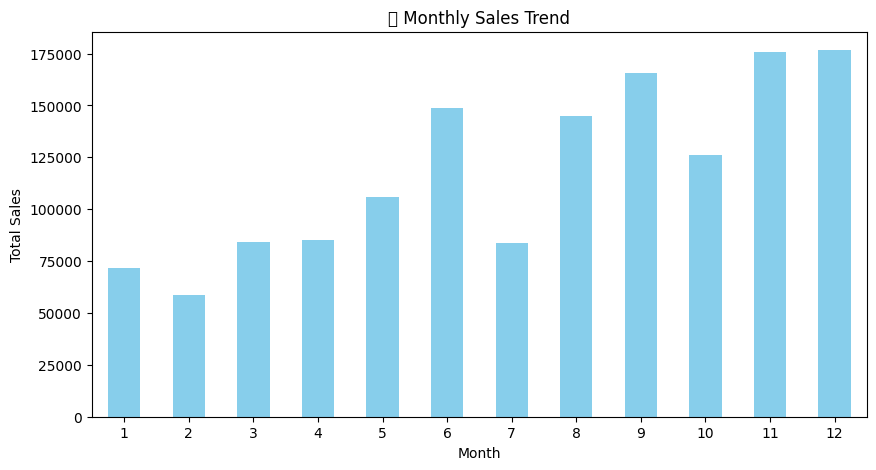

In [20]:
#  4.2 Monthly Sales Distribution
plt.figure(figsize=(10,5))
df.groupby('Month')['Sales'].sum().plot(kind='bar', color='skyblue')
plt.title("📊 Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.show()


C:\Users\kgadg\anaconda3\envs\Deep_Learning\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


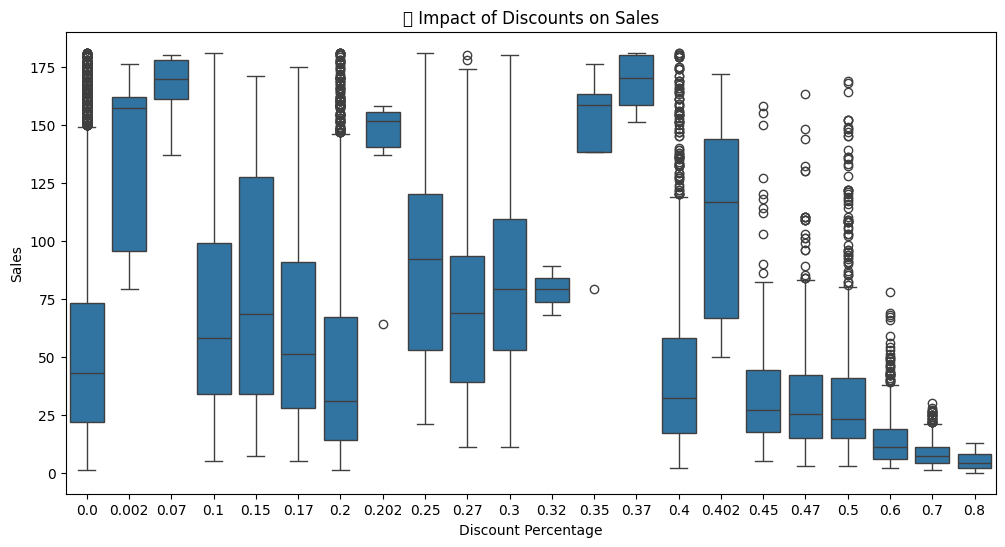

In [21]:
# 5.1 How Discounts Affect Sales
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Discount'], y=df['Sales'])
plt.title("📉 Impact of Discounts on Sales")
plt.xlabel("Discount Percentage")
plt.ylabel("Sales")
plt.show()


C:\Users\kgadg\anaconda3\envs\Deep_Learning\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127876 (\N{CHRISTMAS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


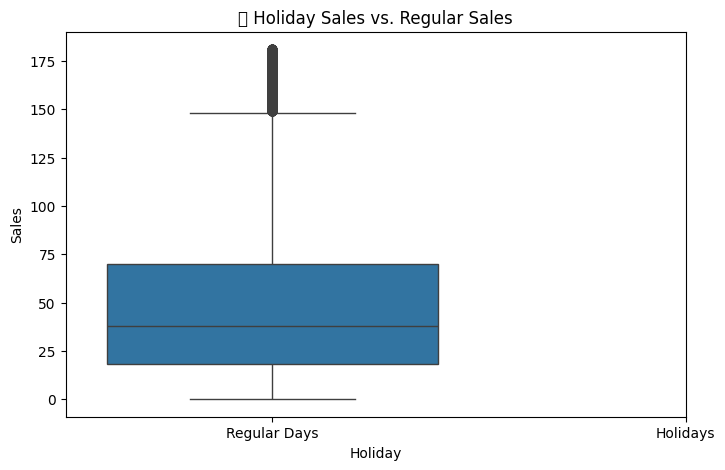

In [23]:
# 5.2 Sales Performance on Holidays
# Create a Holiday Column (Example for US Holidays)
holidays = ['2023-11-24', '2023-12-25', '2023-07-04']
df['Holiday'] = df['Order.Date'].astype(str).isin(holidays).astype(int)

# Plot Sales During Holidays vs. Non-Holidays
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Holiday'], y=df['Sales'])
plt.title("🎄 Holiday Sales vs. Regular Sales")
plt.xticks([0, 1], ['Regular Days', 'Holidays'])
plt.show()

In [25]:
# 6.1 Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("📌 Correlation Matrix")
plt.show()

ValueError: could not convert string to float: 'Office Supplies'

<Figure size 1000x600 with 0 Axes>

C:\Users\kgadg\anaconda3\envs\Deep_Learning\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


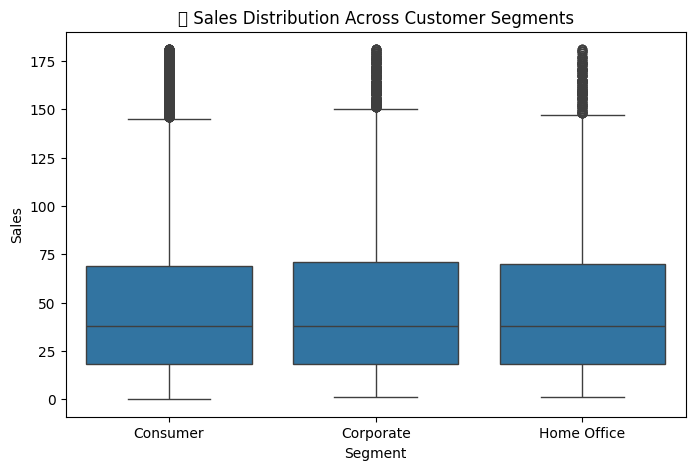

In [26]:
#✅ Step 7: Segment-Wise Analysis
#📌 7.1 Sales by Customer Segment
plt.figure(figsize=(8,5))
sns.boxplot(x='Segment', y='Sales', data=df)
plt.title("📌 Sales Distribution Across Customer Segments")
plt.xticks(rotation=0)
plt.show()


C:\Users\kgadg\anaconda3\envs\Deep_Learning\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


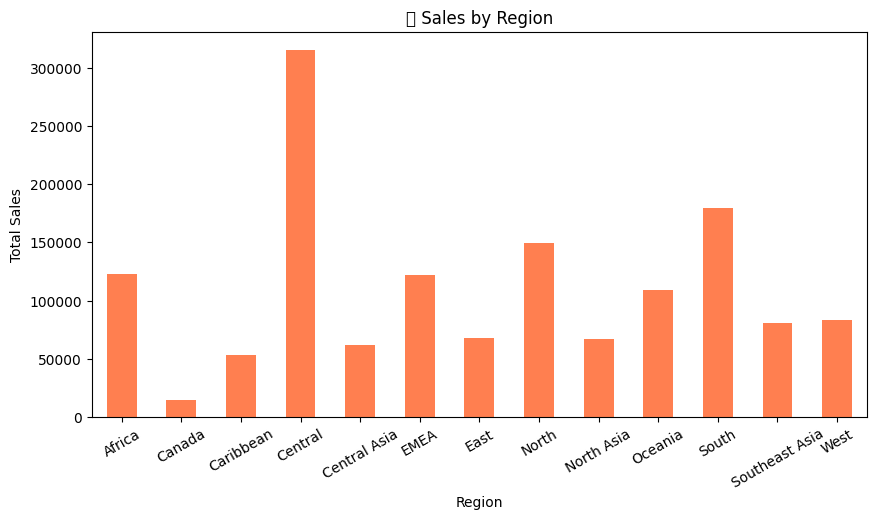

In [27]:
#  7.2 Regional Sales Performance
plt.figure(figsize=(10,5))
df.groupby('Region')['Sales'].sum().plot(kind='bar', color='coral')
plt.title("📌 Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=30)
plt.show()
